<a href="https://colab.research.google.com/github/snigdhashoily/JanyID46_ML/blob/main/JanyID46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Conventional
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
from sklearn.preprocessing import LabelEncoder
import joblib

# Function to extract HOG features
def extract_hog_features(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Could not read image at {image_path}")
            return None
        image = cv2.resize(image, (128, 128))
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        features = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), block_norm='L2-Hys')
        return features
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

# Function to load dataset and extract HOG features
def load_dataset(image_dir):
    images = []
    labels = []
    for label in os.listdir(image_dir):
        label_folder = os.path.join(image_dir, label)
        if os.path.isdir(label_folder):
            for image_name in os.listdir(label_folder):
                image_path = os.path.join(label_folder, image_name)
                features = extract_hog_features(image_path)
                if features is not None:
                    images.append(features)
                    labels.append(label)
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    return np.array(images), np.array(labels)

# Load dataset and extract features
dataset_dir = '/content/drive/MyDrive/mL/Dataset'
X, y = load_dataset(dataset_dir)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Save the trained model
joblib.dump(svm_classifier, 'svm_vehicle_classifier.pkl')

Accuracy: 67.50%


['svm_vehicle_classifier.pkl']

In [ ]:
#CNN
# Image data augmentation
base_dir = '/content/drive/MyDrive/mL/Dataset' # Replace with your actual dataset directory

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Use 20% of the data for validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
#CNN
# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes for the chess pieces
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,399,174 (169.37 MB)

 Trainable params: 44,399,174 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#CNN
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)

# Replace with your actual training data directory
train_dir = '/content/drive/MyDrive/mL/Dataset'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)


Found 400 images belonging to 4 classes.


In [ ]:
#CNN

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

import numpy as np
import os


# Define CNN architecture
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(train_generator.classes)), activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)

# Replace with your actual training data directory
train_dir = '/content/drive/MyDrive/mL/Dataset'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

# Train the CNN model
cnn_model.fit(train_generator, epochs=10, steps_per_epoch=100)

# Save the model after training
cnn_model.save('vehicle_cnn_model.h5')

# Evaluate the CNN model (on test data)
test_datagen = ImageDataGenerator(rescale=1./255)

# Replace with your actual test data directory
test_dir = '/content/drive/MyDrive/mL/Dataset'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

Found 400 images belonging to 4 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 520ms/step - accuracy: 0.2672 - loss: 2.1649
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 431ms/step - accuracy: 0.3974 - loss: 1.3075
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 461ms/step - accuracy: 0.5582 - loss: 1.0681
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 431ms/step - accuracy: 0.6941 - loss: 0.8387
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 438ms/step - accuracy: 0.7300 - loss: 0.7037
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 410ms/step - accuracy: 0.8263 - loss: 0.4642
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 444ms/step - accuracy: 0.9040 - loss: 0.3120
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 434ms/step - accuracy: 0.9480 - loss: 0.1976
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 410ms/step - accuracy: 0.9608 - loss: 0.1296
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 86s 475ms/step - accuracy: 0.9866 - loss: 0.0538


Found 400 images belonging to 4 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9891 - loss: 0.0688
Test Accuracy: 0.9850000143051147


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


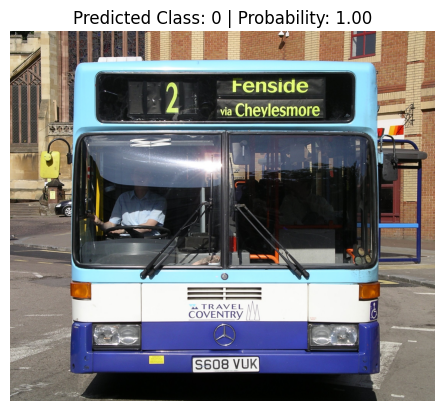

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


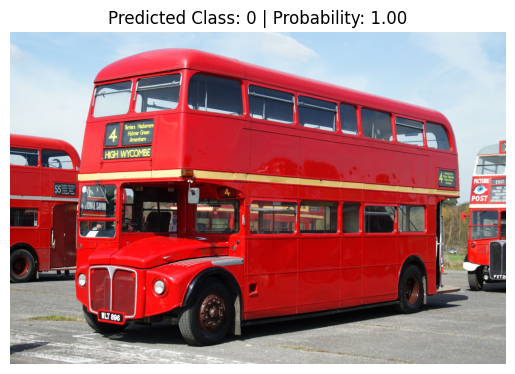

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


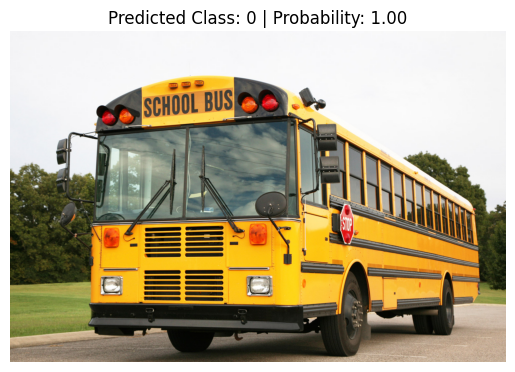

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


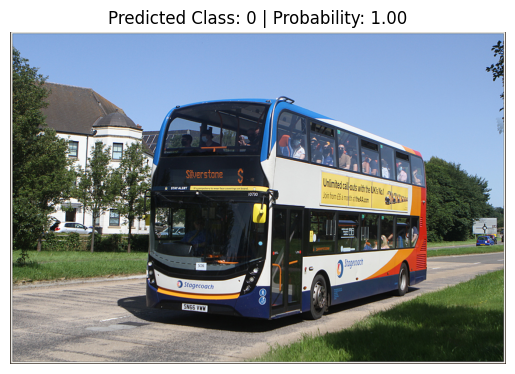

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


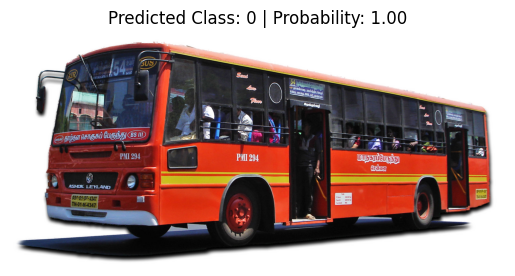

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


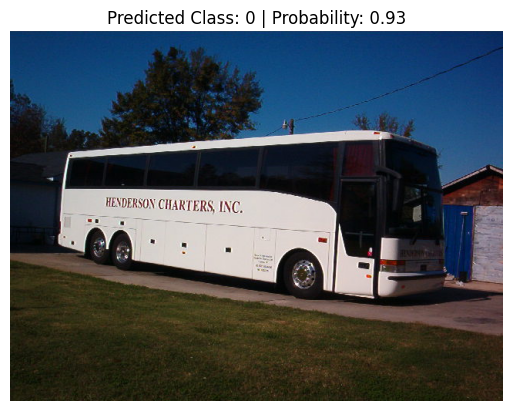

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load model and preprocessing function
cnn_model = tf.keras.models.load_model('vehicle_cnn_model.h5')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    return np.expand_dims(image.img_to_array(img), axis=0) / 255.0

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = cnn_model.predict(img_array)
    return np.argmax(predictions), predictions

def visualize_prediction(img_path, predicted_class, predictions):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class} | Probability: {np.max(predictions):.2f}")
    plt.show()

# Example of making a prediction on a single image
test_img_path = '/content/drive/MyDrive/mL/Dataset/Bus/Image_100.jpg'
predicted_class, predictions = predict_image(test_img_path)
visualize_prediction(test_img_path, predicted_class, predictions)

# Visualize predictions for multiple images
test_dir = '/content/drive/MyDrive/mL/Dataset/Bus'
for img_file in os.listdir(test_dir)[:5]:  # Show predictions for first 5 images
    img_path = os.path.join(test_dir, img_file)
    predicted_class, predictions = predict_image(img_path)
    visualize_prediction(img_path, predicted_class, predictions)


In [ ]:
# We'll use the digits dataset from sklearn
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.images
y = digits.target

Shape of X: (1797, 8, 8)
Shape of y: (1797,)
Target label: 1


<Figure size 640x480 with 0 Axes>

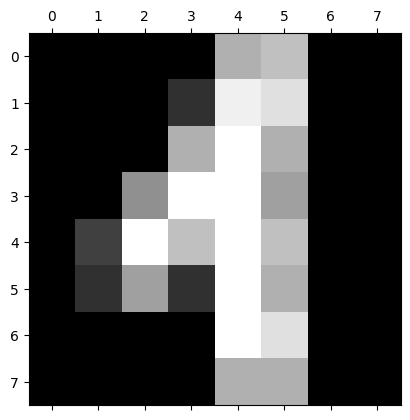

In [ ]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

#Displaying and image from the dataset
plt.gray()
print(f"Target label: {digits.target[200]}")
plt.matshow(digits.images[200])
plt.show()